In [33]:
import cv2, json, wandb
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from utils import plot_images

In [34]:
api = wandb.Api()
artifact = api.artifact("g1y5x3/fisheye-challenge/run_g455f5ab_model:best")
artifact_dir = artifact.download()
artifact_dir

wandb: Downloading large artifact run_g455f5ab_model:best, 130.58MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.4


'/workspace/fisheye_challenge/artifacts/run_g455f5ab_model:v0'

In [35]:
model = YOLO(f"{artifact_dir}/best.pt")

In [36]:
train_dir = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/"
gt_dir = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/train.json"
with open(gt_dir) as f: gts   = json.load(f)
gt_img, gt_ann = gts["images"], gts["annotations"]

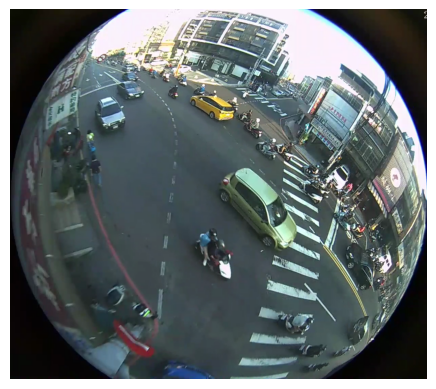

In [37]:
idx = "camera3_A_100.png"

img = Image.open(train_dir + "images/" + idx)
plt.imshow(img)
plt.axis('off') # Remove axes for cleaner display
plt.show()

## Ground Truth

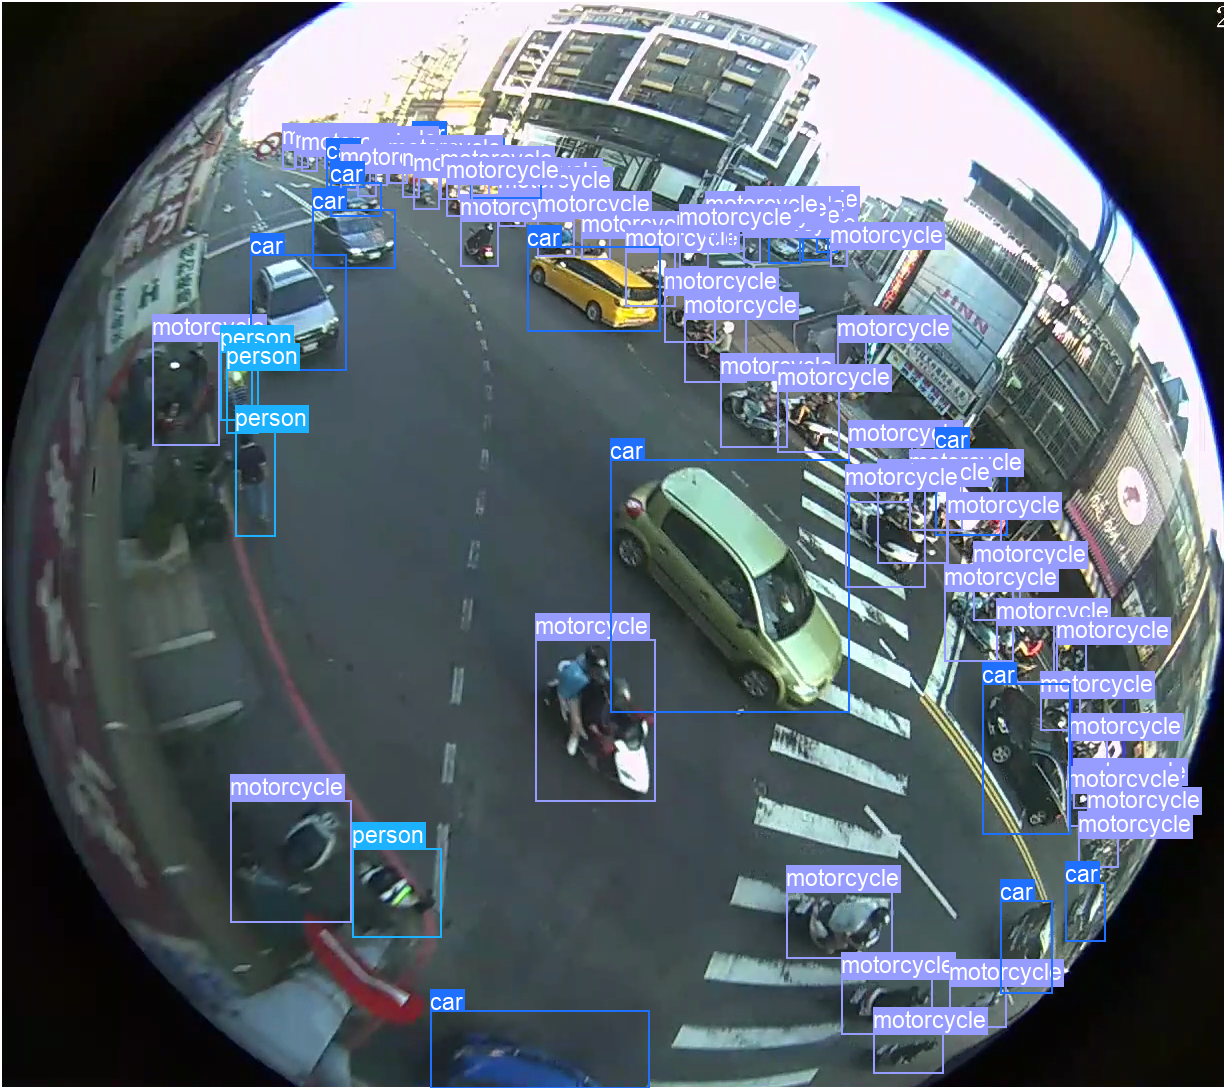

In [38]:
img = cv2.imread(train_dir + "images/" + idx)

# get ground truth
img_id = [gt["id"] for gt in gt_img if gt["file_name"] == idx]
bboxes = np.array([gt["bbox"] for gt in gt_ann if gt["image_id"] == img_id[0]])
cls = np.array([gt["category_id"] for gt in gt_ann if gt["image_id"] == img_id[0]])
names = {0: 'bus', 1: 'motorcycle', 2: 'car', 3: 'person', 4: 'truck'}

img_gt = plot_images(img, cls, bboxes, None, names, plot=True)

In [49]:
img_new = np.concatenate((img[544:,:,:], img[:544,:,:]), axis=0)
img_new.shape

(1088, 1225, 3)

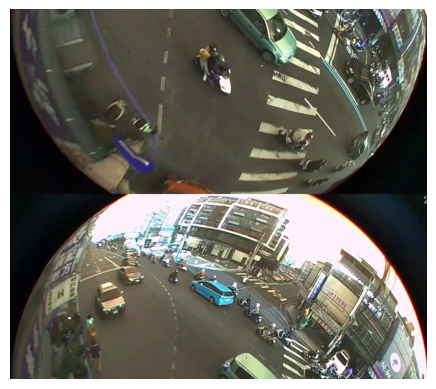

In [50]:
plt.imshow(img_new)
plt.axis('off') # Remove axes for cleaner display
plt.show()

In [51]:
results = model.predict(img_new, project="fisheye", name="dcn_results", visualize=True, show_labels=False, show_conf=False)


Saving fisheye/dcn_results6/image0/stage0_DeformableConv_features.png... (32/80)
Saving fisheye/dcn_results6/image0/stage1_DeformableConv_features.png... (32/160)
Saving fisheye/dcn_results6/image0/stage2_C2f_features.png... (32/160)
Saving fisheye/dcn_results6/image0/stage3_Conv_features.png... (32/320)
Saving fisheye/dcn_results6/image0/stage4_C2f_features.png... (32/320)
Saving fisheye/dcn_results6/image0/stage5_Conv_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stage6_C2f_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stage7_Conv_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stage8_C2f_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stage9_SPPF_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stage10_Upsample_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stage11_Concat_features.png... (32/1280)
Saving fisheye/dcn_results6/image0/stage12_C2f_features.png... (32/640)
Saving fisheye/dcn_results6/image0/stag

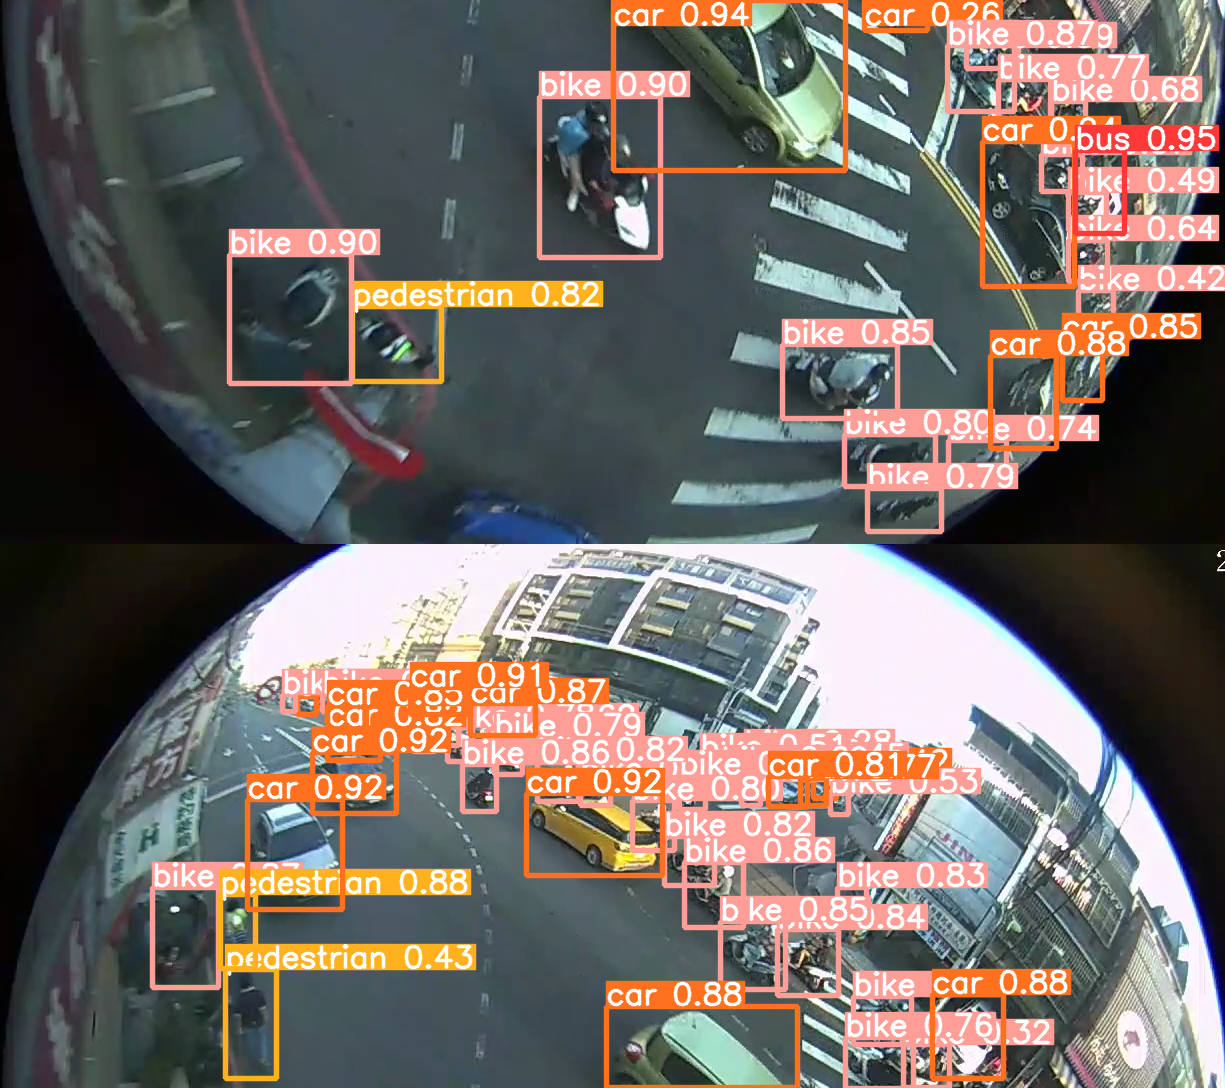

In [52]:
results[0].show()

## Inspect the receptive field of the model

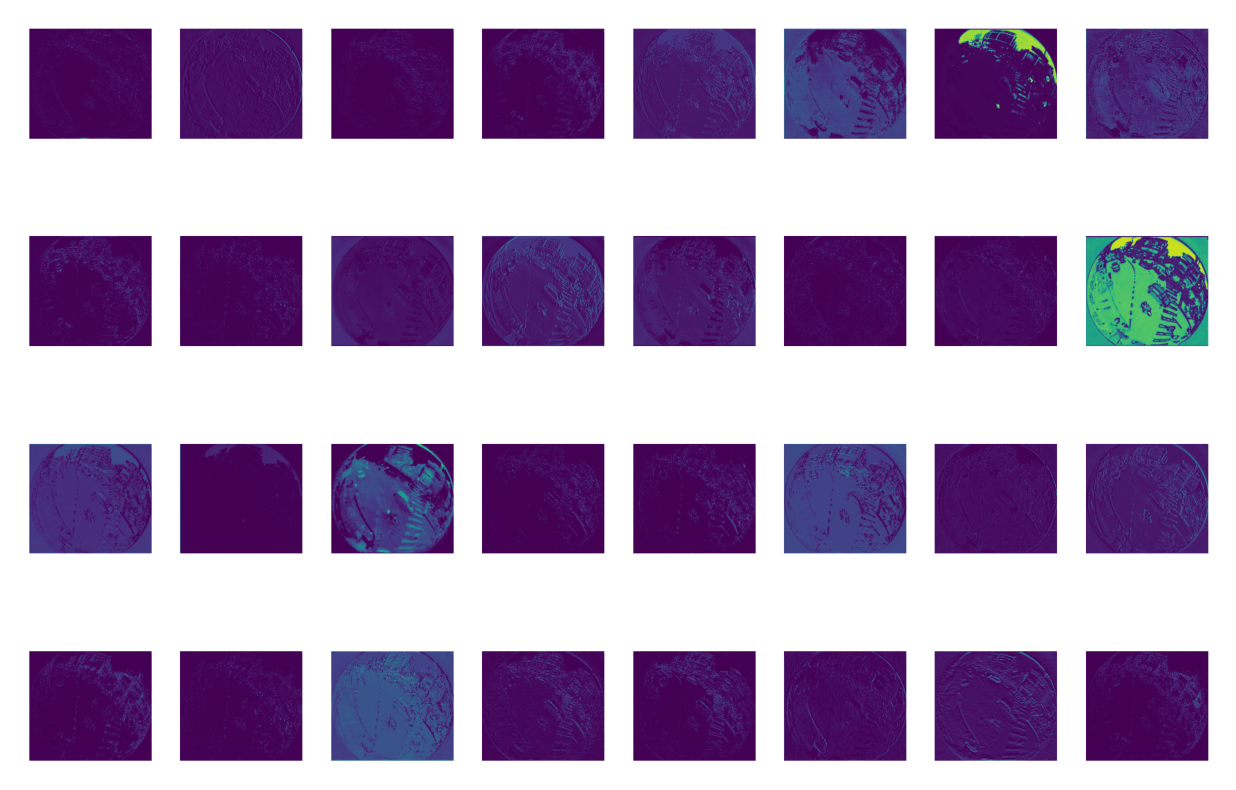

In [29]:
%matplotlib inline
img = Image.open("fisheye/dcn_results2/image0/stage1_DeformableConv_features.png")
plt.figure(figsize=(26,10))
plt.imshow(img)
plt.axis('off') # Remove axes for cleaner display
plt.show()

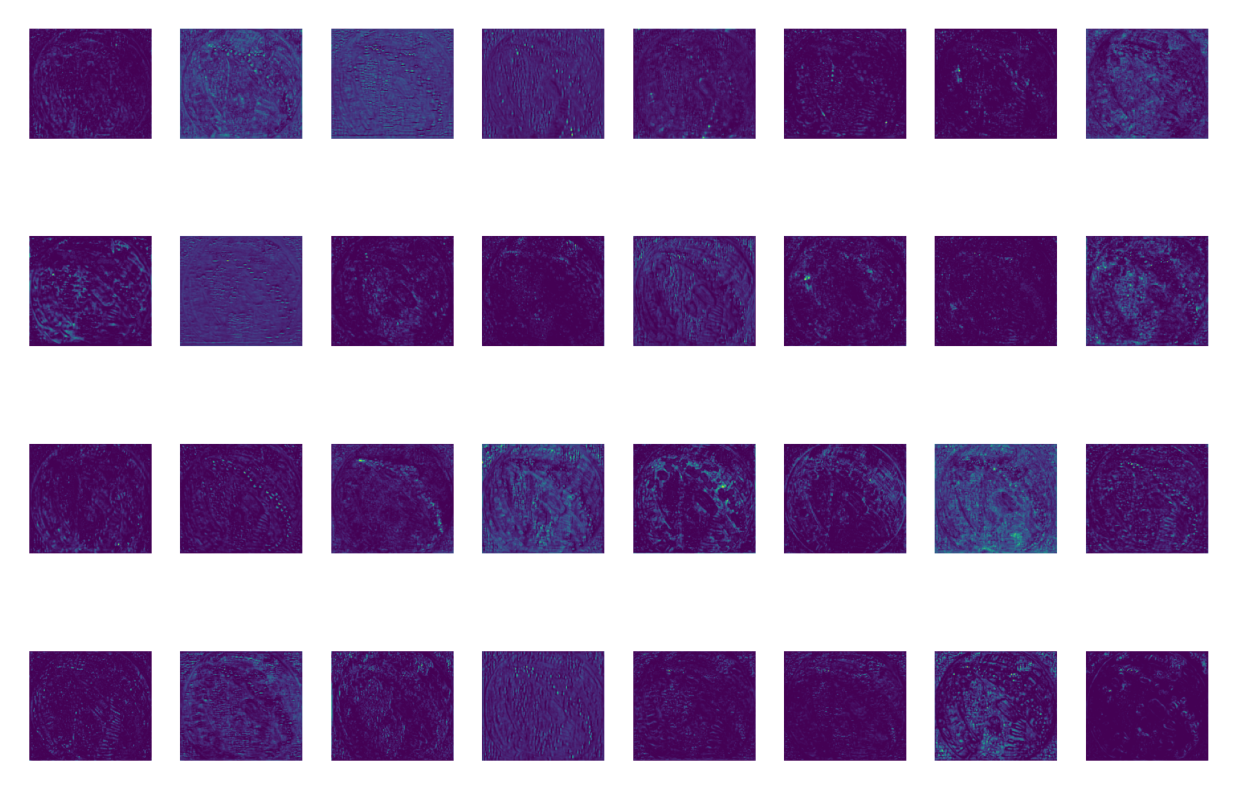

In [30]:
%matplotlib inline
img = Image.open("fisheye/results/image0/stage15_C2f_features.png")
plt.figure(figsize=(26,10))
plt.imshow(img)
plt.axis('off') # Remove axes for cleaner display
plt.show()

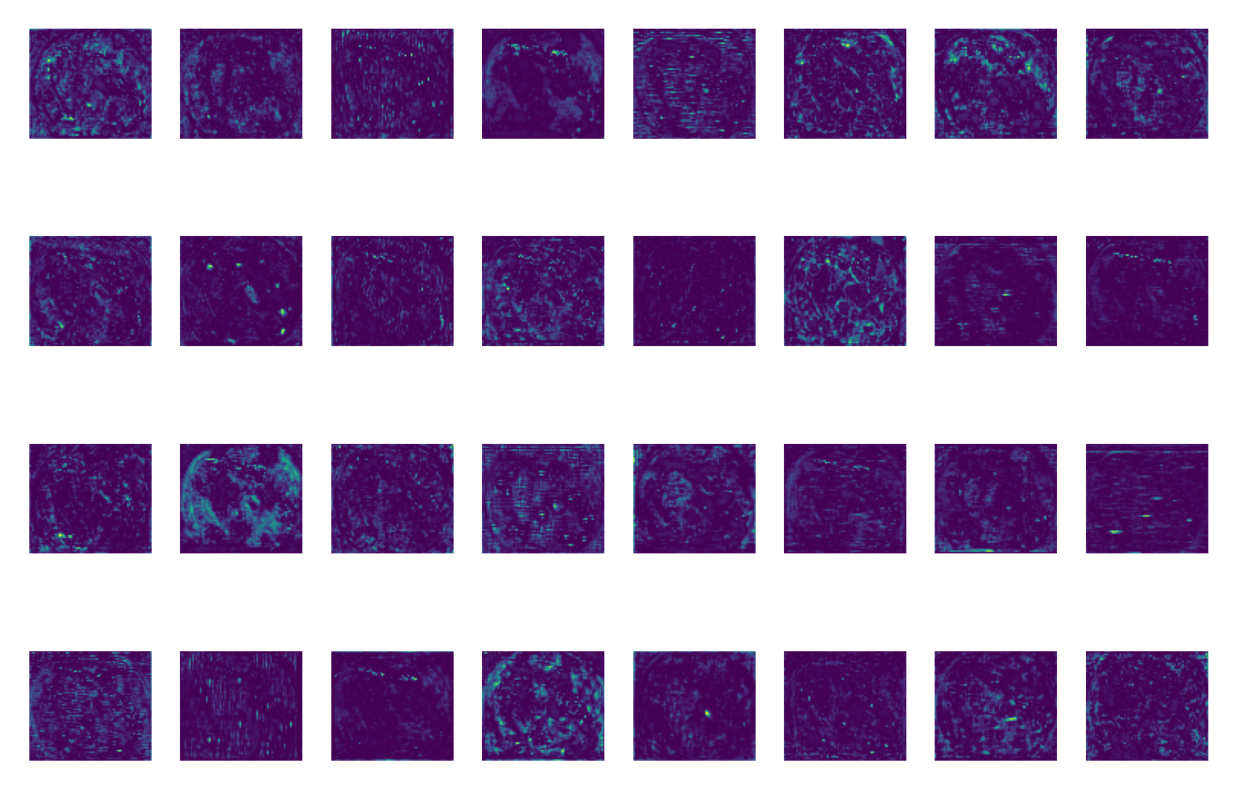

In [31]:
%matplotlib inline
img = Image.open("fisheye/results/image0/stage18_C2f_features.png")
plt.figure(figsize=(26,10))
plt.imshow(img)
plt.axis('off') # Remove axes for cleaner display
plt.show()

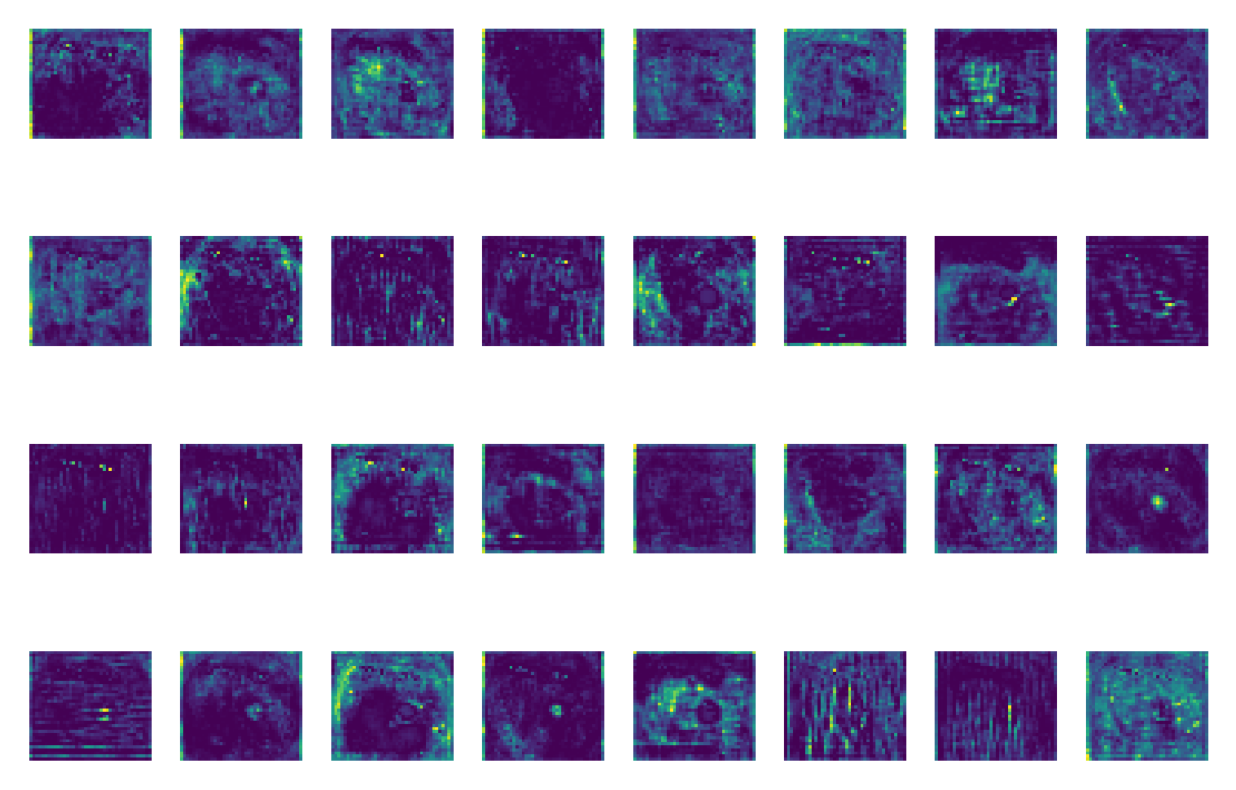

In [32]:
%matplotlib inline
img = Image.open("fisheye/results/image0/stage21_C2f_features.png")
plt.figure(figsize=(26,10))
plt.imshow(img)
plt.axis('off') # Remove axes for cleaner display
plt.show()